In [1]:
#https://www.kaggle.com/function9/bidirectional-lstm-gan-music-generation
#https://www.kaggle.com/abhisheksinha28/bidirectional-lstm/data
#https://www.kaggle.com/sekfook97/gan-for-anomaly-detection
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np


from tensorflow.keras import layers
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Bidirectional, LSTM, Reshape, RepeatVector, TimeDistributed
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

import os

from PIL import Image

Using TensorFlow backend.


In [2]:
dtypes = {
"feature1": np.float16,
"feature2": np.float16,
"feature3": np.float16,
"feature4": np.float16,
"feature5": np.float16,
"feature6": np.float16,
"feature7": np.float16,
"feature8": np.float16,
"label": np.object}    
columns = ["feature1","feature2","feature3","feature4","feature5","feature6","feature7","feature8","feature9","feature10","feature11","feature12","feature13","feature14","feature15","feature16","feature17","feature18","feature19","feature20","label"]
#df = pd.read_csv("/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected", sep=",", names=columns, dtype=dtypes, index_col=None)
df = pd.read_csv(r"C:\Users\admin\ablation study - 20 neurons\afterdimensionalityreduction",sep=",", names=columns, dtype=str, index_col=None)
#df_read = pd.read_csv(savefile, dtype=str, index_col=0)
#print(type(train))

In [3]:
df.label.value_counts()

Normal      595798
Abnormal    452778
Name: label, dtype: int64

In [4]:
#Feature Selection
new_features=["feature1","feature2","feature3","feature4","feature5","feature6","feature7","feature8","feature9","feature10","feature11","feature12","feature13","feature14","feature15","feature16","feature17","feature18","feature19","feature20","label"]

In [5]:
# 0 for normal data and 1 for abnormalities
df.label=df.label.apply(lambda x: 0 if x == 'Normal' else 1)

In [6]:
df.shape

(1048576, 21)

In [7]:
df=df[new_features]

In [8]:
df.head

<bound method NDFrame.head of             feature1               feature2 feature3     feature4  \
0        0.049896017                    0.0      0.0  0.074576885   
1         0.05703238                    0.0      0.0          0.0   
2         0.05211395  0.0006721932400000001      0.0          0.0   
3         0.04974308            0.003009851      0.0          0.0   
4         0.04832898              0.0042979      0.0          0.0   
...              ...                    ...      ...          ...   
1048571  0.023582537            0.011685466      0.0          0.0   
1048572  0.023108114             0.01054538      0.0          0.0   
1048573  0.022631112            0.008008906      0.0          0.0   
1048574  0.022127744            0.008818104      0.0          0.0   
1048575   0.02162299   0.008149143000000001      0.0          0.0   

             feature5              feature6 feature7              feature8  \
0                 0.0          0.0035594553      0.0           

In [9]:
#np.where(df.values >= np.finfo(np.float64).max)

In [10]:
df.head

<bound method NDFrame.head of             feature1               feature2 feature3     feature4  \
0        0.049896017                    0.0      0.0  0.074576885   
1         0.05703238                    0.0      0.0          0.0   
2         0.05211395  0.0006721932400000001      0.0          0.0   
3         0.04974308            0.003009851      0.0          0.0   
4         0.04832898              0.0042979      0.0          0.0   
...              ...                    ...      ...          ...   
1048571  0.023582537            0.011685466      0.0          0.0   
1048572  0.023108114             0.01054538      0.0          0.0   
1048573  0.022631112            0.008008906      0.0          0.0   
1048574  0.022127744            0.008818104      0.0          0.0   
1048575   0.02162299   0.008149143000000001      0.0          0.0   

             feature5              feature6 feature7              feature8  \
0                 0.0          0.0035594553      0.0           

In [11]:
df.shape

(1048576, 21)

In [12]:
df.head

<bound method NDFrame.head of             feature1               feature2 feature3     feature4  \
0        0.049896017                    0.0      0.0  0.074576885   
1         0.05703238                    0.0      0.0          0.0   
2         0.05211395  0.0006721932400000001      0.0          0.0   
3         0.04974308            0.003009851      0.0          0.0   
4         0.04832898              0.0042979      0.0          0.0   
...              ...                    ...      ...          ...   
1048571  0.023582537            0.011685466      0.0          0.0   
1048572  0.023108114             0.01054538      0.0          0.0   
1048573  0.022631112            0.008008906      0.0          0.0   
1048574  0.022127744            0.008818104      0.0          0.0   
1048575   0.02162299   0.008149143000000001      0.0          0.0   

             feature5              feature6 feature7              feature8  \
0                 0.0          0.0035594553      0.0           

In [13]:
df = pd.DataFrame(df)   
df1 = pd.DataFrame(df)  

In [14]:
df.label.value_counts()

0    595798
1    452778
Name: label, dtype: int64

In [15]:
#randomly sample 500 data point for training
df_train=df[df.label==1].sample(40000)

In [16]:
df_train.shape

(40000, 21)

In [17]:
#remove the item sampled from our dataset
#index_list=df_train.index
#df=df.drop(index_list)

In [18]:
df_train.iloc[1]

feature1            0.0
feature2            0.0
feature3            0.0
feature4            0.0
feature5            0.0
feature6      0.1171062
feature7            0.0
feature8            0.0
feature9     0.31030872
feature10           0.0
feature11           0.0
feature12           0.0
feature13           0.0
feature14           0.0
feature15           0.0
feature16           0.0
feature17           0.0
feature18           0.0
feature19           0.0
feature20           0.0
label                 1
Name: 436000, dtype: object

In [19]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,0.049896017,0.0,0.0,0.074576885,0.0,0.0035594553,0.0,0.012225969,0.0,0.019287573,...,0.0,0.0,0.0,0.0,0.0,0.06614828,0.0,0.0,0.0,0
1,0.05703238,0.0,0.0,0.0,0.052905086,0.043763362,0.0,0.0,0.0,0.031135669,...,0.0,0.0,0.0,0.006044184,0.0,0.0,0.0,0.0,0.0,0
2,0.05211395,0.0006721932400000001,0.0,0.0,0.01591806,0.02435071,0.0,0.0016837418,0.0,0.02647767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.04974308,0.003009851,0.0,0.0,0.0029502455,0.017709356000000002,0.0,0.0066348887,0.0,0.025008397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.04832898,0.0042979,0.0,0.0,0.0,0.014554087,0.0,0.009138886,0.0,0.024143761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
#drop the label columns
df_label=df_train.label
df_train=df_train.drop('label',axis=1)

In [21]:
df_label
df_label.to_csv('abnormallabel.csv', index=False)

In [22]:
df_train.shape

(40000, 20)

In [23]:
df_train = pd.DataFrame(df_train)

In [24]:
df_train.iloc[1]

feature1            0.0
feature2            0.0
feature3            0.0
feature4            0.0
feature5            0.0
feature6      0.1171062
feature7            0.0
feature8            0.0
feature9     0.31030872
feature10           0.0
feature11           0.0
feature12           0.0
feature13           0.0
feature14           0.0
feature15           0.0
feature16           0.0
feature17           0.0
feature18           0.0
feature19           0.0
feature20           0.0
Name: 436000, dtype: object

In [25]:
df_train.shape

(40000, 20)

In [26]:
df_train=df_train.values.reshape((df_train.shape[0], 1, df_train.shape[1]))

In [27]:
df_train.shape

(40000, 1, 20)

In [28]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,0.049896017,0.0,0.0,0.074576885,0.0,0.0035594553,0.0,0.012225969,0.0,0.019287573,...,0.0,0.0,0.0,0.0,0.0,0.06614828,0.0,0.0,0.0,0
1,0.05703238,0.0,0.0,0.0,0.052905086,0.043763362,0.0,0.0,0.0,0.031135669,...,0.0,0.0,0.0,0.006044184,0.0,0.0,0.0,0.0,0.0,0
2,0.05211395,0.0006721932400000001,0.0,0.0,0.01591806,0.02435071,0.0,0.0016837418,0.0,0.02647767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.04974308,0.003009851,0.0,0.0,0.0029502455,0.017709356000000002,0.0,0.0066348887,0.0,0.025008397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.04832898,0.0042979,0.0,0.0,0.0,0.014554087,0.0,0.009138886,0.0,0.024143761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization

from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from keras import optimizers
from keras.utils import plot_model
timesteps =  df_train.shape[1] # equal to the lookback
n_features =  df_train.shape[2] # 59

epochs = 15
batch = 64
lr = 0.0001

In [30]:
history=dict()
history['gen']=[]
history['dis']=[]

In [31]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error
                             ,mean_absolute_error)
from sklearn import metrics

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [32]:
class LSTMGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 1
        self.img_cols = 20
        self.img_shape = (self.img_rows, self.img_cols)
        self.latent_dim = 20

        optimizer = Adam(0.0001, 0.4)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates song
        z = Input(shape=(1,20))
    
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()
        model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, 20)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128)))
        model.add(LeakyReLU(alpha=0.2))
        #specifying output to have 40 timesteps
        model.add(RepeatVector(20))
        #specifying 1 feature as the output
        
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.3))   
        model.add(TimeDistributed(Dense(128)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(128)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(1)))
        model.add(LeakyReLU(alpha=0.2))
        model.summary()

        noise = Input(shape=(1,20))
        img = model(noise)

        return Model(noise, img)
        #return Model(img)
    

    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(64, use_bias=False, input_shape=(20, 1)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Convolution1D(32, 3, strides=2, padding='same', use_bias=False))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Convolution1D(1, 3, strides=2, padding='same', use_bias=False))
        model.add(Flatten())        
        model.add(RepeatVector(1))        
        model.add(TimeDistributed(Dense(32, activation = 'relu')))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(TimeDistributed(Dense(1, activation = 'relu')))
        #model.add(TimeDistributed(Dense(1)))
        #model.add(Dense(1, activation='tanh'))
        #model.add(Dense(1))
        #model.add(Activation('sigmoid'))
        model.summary()
        #model.add(layers.BatchNormalization())
        #model.add(sigmoid())
       
        img = Input(shape=(20,1))
        validity = model(img)
        print("exit")
        return Model(img, validity)

    def train(self, epochs=15, batch_size=64, save_interval=50):
        print("enter")  
        # Load the dataset
        X_train = df_train
       
        # Rescale 0 to 1
      #  X_train = X_train / 128

        # Adversarial ground truths
        valid = np.ones((batch_size,1,1))
        fake = np.zeros((batch_size,1,1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of songs
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            imgs = np.array(imgs)
            imgs = imgs.reshape(len(imgs),20,1)

            # Sample noise and generate a batch of new songs
            noise = np.random.normal(0, 1, (batch_size,1,20))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake songs as real)
            g_loss = self.combined.train_on_batch(noise, valid)
            history['gen'].append(g_loss)
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            history['dis'].append(d_loss) 
            #return (g_loss,d_loss)
            # If at save interval => save model
#            if epoch % save_interval == 0:
 #               self.generator.save("LSTM_generator.h5")


In [33]:
lstmgan = LSTMGAN()
#lstmgan.train(epochs=1000, batch_size=20, save_interval=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20, 64)            64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 20, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 32)            6144      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 1)              96        
_________________________________________________________________
flatten_1 (Flatten)          (None, 5)                

In [34]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

In [35]:
lstmgan.train(epochs=1000, batch_size=20, save_interval=100)

enter


C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 4.790564, acc.: 50.00%] [G loss: 7.530931]


C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 4.326564, acc.: 50.00%] [G loss: 6.737534]
2 [D loss: 3.488968, acc.: 50.00%] [G loss: 6.232628]
3 [D loss: 3.408130, acc.: 50.00%] [G loss: 5.927962]
4 [D loss: 3.422532, acc.: 50.00%] [G loss: 5.819317]
5 [D loss: 3.019253, acc.: 50.00%] [G loss: 5.748940]
6 [D loss: 3.601867, acc.: 50.00%] [G loss: 5.521670]
7 [D loss: 2.723381, acc.: 50.00%] [G loss: 5.518656]
8 [D loss: 3.177216, acc.: 50.00%] [G loss: 5.371750]
9 [D loss: 2.657425, acc.: 50.00%] [G loss: 5.390020]
10 [D loss: 2.980903, acc.: 50.00%] [G loss: 5.261878]
11 [D loss: 2.653734, acc.: 50.00%] [G loss: 5.192923]
12 [D loss: 2.836585, acc.: 50.00%] [G loss: 5.060465]
13 [D loss: 2.582577, acc.: 50.00%] [G loss: 4.965248]
14 [D loss: 2.534016, acc.: 50.00%] [G loss: 5.006494]
15 [D loss: 2.448184, acc.: 50.00%] [G loss: 4.935673]
16 [D loss: 2.433904, acc.: 50.00%] [G loss: 4.924684]
17 [D loss: 2.478136, acc.: 50.00%] [G loss: 4.853754]
18 [D loss: 2.361714, acc.: 50.00%] [G loss: 4.845382]
19 [D loss: 2.41783

150 [D loss: 1.621742, acc.: 50.00%] [G loss: 3.388722]
151 [D loss: 1.656626, acc.: 50.00%] [G loss: 3.364377]
152 [D loss: 1.649006, acc.: 50.00%] [G loss: 3.302552]
153 [D loss: 1.642778, acc.: 50.00%] [G loss: 3.292558]
154 [D loss: 1.661460, acc.: 50.00%] [G loss: 3.321251]
155 [D loss: 1.653894, acc.: 50.00%] [G loss: 3.310697]
156 [D loss: 1.583409, acc.: 50.00%] [G loss: 3.283447]
157 [D loss: 1.694911, acc.: 50.00%] [G loss: 3.331925]
158 [D loss: 1.620653, acc.: 50.00%] [G loss: 3.314803]
159 [D loss: 1.626543, acc.: 50.00%] [G loss: 3.235073]
160 [D loss: 1.634686, acc.: 50.00%] [G loss: 3.219673]
161 [D loss: 1.626157, acc.: 50.00%] [G loss: 3.247142]
162 [D loss: 1.653254, acc.: 50.00%] [G loss: 3.260070]
163 [D loss: 1.610307, acc.: 50.00%] [G loss: 3.323451]
164 [D loss: 1.637792, acc.: 50.00%] [G loss: 3.204430]
165 [D loss: 1.686441, acc.: 50.00%] [G loss: 3.130700]
166 [D loss: 1.625927, acc.: 50.00%] [G loss: 3.251459]
167 [D loss: 1.595613, acc.: 50.00%] [G loss: 3.

297 [D loss: 1.395933, acc.: 50.00%] [G loss: 2.831754]
298 [D loss: 1.387817, acc.: 50.00%] [G loss: 2.757848]
299 [D loss: 1.421250, acc.: 50.00%] [G loss: 2.747105]
300 [D loss: 1.383885, acc.: 50.00%] [G loss: 2.802102]
301 [D loss: 1.323843, acc.: 50.00%] [G loss: 2.760962]
302 [D loss: 1.365358, acc.: 50.00%] [G loss: 2.731079]
303 [D loss: 1.379513, acc.: 50.00%] [G loss: 2.854000]
304 [D loss: 1.391289, acc.: 50.00%] [G loss: 2.730787]
305 [D loss: 1.434415, acc.: 50.00%] [G loss: 2.783452]
306 [D loss: 1.374862, acc.: 50.00%] [G loss: 2.786022]
307 [D loss: 1.322755, acc.: 50.00%] [G loss: 2.719787]
308 [D loss: 1.422624, acc.: 50.00%] [G loss: 2.778891]
309 [D loss: 1.399338, acc.: 50.00%] [G loss: 2.708071]
310 [D loss: 1.315843, acc.: 50.00%] [G loss: 2.761788]
311 [D loss: 1.341386, acc.: 50.00%] [G loss: 2.773743]
312 [D loss: 1.310891, acc.: 50.00%] [G loss: 2.816254]
313 [D loss: 1.392208, acc.: 50.00%] [G loss: 2.786212]
314 [D loss: 1.361949, acc.: 50.00%] [G loss: 2.

444 [D loss: 1.135211, acc.: 50.00%] [G loss: 2.491488]
445 [D loss: 1.113622, acc.: 50.00%] [G loss: 2.476728]
446 [D loss: 1.207978, acc.: 50.00%] [G loss: 2.452290]
447 [D loss: 1.178055, acc.: 50.00%] [G loss: 2.464275]
448 [D loss: 1.051241, acc.: 50.00%] [G loss: 2.497684]
449 [D loss: 1.154449, acc.: 50.00%] [G loss: 2.516216]
450 [D loss: 1.109884, acc.: 50.00%] [G loss: 2.481813]
451 [D loss: 1.153408, acc.: 50.00%] [G loss: 2.480247]
452 [D loss: 1.186598, acc.: 50.00%] [G loss: 2.512868]
453 [D loss: 1.066421, acc.: 50.00%] [G loss: 2.391934]
454 [D loss: 1.163452, acc.: 50.00%] [G loss: 2.540417]
455 [D loss: 1.032024, acc.: 50.00%] [G loss: 2.460399]
456 [D loss: 1.143509, acc.: 50.00%] [G loss: 2.434130]
457 [D loss: 1.167480, acc.: 50.00%] [G loss: 2.442801]
458 [D loss: 1.125498, acc.: 50.00%] [G loss: 2.497920]
459 [D loss: 1.211866, acc.: 50.00%] [G loss: 2.431490]
460 [D loss: 1.158190, acc.: 50.00%] [G loss: 2.420029]
461 [D loss: 1.108116, acc.: 50.00%] [G loss: 2.

591 [D loss: 0.871210, acc.: 50.00%] [G loss: 2.280814]
592 [D loss: 1.030178, acc.: 50.00%] [G loss: 2.312541]
593 [D loss: 0.995778, acc.: 50.00%] [G loss: 2.267689]
594 [D loss: 1.038607, acc.: 50.00%] [G loss: 2.266664]
595 [D loss: 1.087044, acc.: 50.00%] [G loss: 2.248202]
596 [D loss: 0.943376, acc.: 50.00%] [G loss: 2.293661]
597 [D loss: 0.987809, acc.: 50.00%] [G loss: 2.296037]
598 [D loss: 0.880498, acc.: 50.00%] [G loss: 2.207221]
599 [D loss: 0.975846, acc.: 50.00%] [G loss: 2.214980]
600 [D loss: 0.969116, acc.: 50.00%] [G loss: 2.229888]
601 [D loss: 0.916150, acc.: 50.00%] [G loss: 2.281934]
602 [D loss: 0.924923, acc.: 50.00%] [G loss: 2.072102]
603 [D loss: 1.107460, acc.: 50.00%] [G loss: 2.111438]
604 [D loss: 0.969732, acc.: 50.00%] [G loss: 2.164081]
605 [D loss: 0.949559, acc.: 50.00%] [G loss: 2.209099]
606 [D loss: 0.968257, acc.: 50.00%] [G loss: 2.200952]
607 [D loss: 0.903859, acc.: 50.00%] [G loss: 2.198009]
608 [D loss: 0.994721, acc.: 50.00%] [G loss: 2.

738 [D loss: 0.826664, acc.: 50.00%] [G loss: 6.361764]
739 [D loss: 0.739913, acc.: 50.00%] [G loss: 8.190435]
740 [D loss: 0.898615, acc.: 47.50%] [G loss: 5.365908]
741 [D loss: 0.809016, acc.: 50.00%] [G loss: 8.576971]
742 [D loss: 0.819749, acc.: 52.50%] [G loss: 5.710984]
743 [D loss: 0.867350, acc.: 50.00%] [G loss: 9.142164]
744 [D loss: 0.809684, acc.: 50.00%] [G loss: 8.081362]
745 [D loss: 0.822044, acc.: 50.00%] [G loss: 7.329423]
746 [D loss: 0.849089, acc.: 50.00%] [G loss: 8.977072]
747 [D loss: 0.730374, acc.: 52.50%] [G loss: 10.245598]
748 [D loss: 0.848657, acc.: 50.00%] [G loss: 8.736257]
749 [D loss: 0.838251, acc.: 50.00%] [G loss: 6.220009]
750 [D loss: 0.802158, acc.: 50.00%] [G loss: 6.904691]
751 [D loss: 0.779423, acc.: 50.00%] [G loss: 6.131171]
752 [D loss: 0.827705, acc.: 50.00%] [G loss: 7.242630]
753 [D loss: 0.880707, acc.: 50.00%] [G loss: 5.422708]
754 [D loss: 0.841416, acc.: 50.00%] [G loss: 6.594401]
755 [D loss: 0.888797, acc.: 47.50%] [G loss: 8

885 [D loss: 0.731159, acc.: 55.00%] [G loss: 6.010399]
886 [D loss: 0.791729, acc.: 57.50%] [G loss: 8.063124]
887 [D loss: 0.642992, acc.: 60.00%] [G loss: 4.465185]
888 [D loss: 0.733069, acc.: 52.50%] [G loss: 5.617355]
889 [D loss: 0.749316, acc.: 52.50%] [G loss: 8.042116]
890 [D loss: 0.748415, acc.: 55.00%] [G loss: 5.542595]
891 [D loss: 0.841223, acc.: 52.50%] [G loss: 5.165083]
892 [D loss: 0.733380, acc.: 52.50%] [G loss: 8.233009]
893 [D loss: 0.752853, acc.: 52.50%] [G loss: 8.753809]
894 [D loss: 0.661101, acc.: 62.50%] [G loss: 6.413085]
895 [D loss: 0.739621, acc.: 57.50%] [G loss: 5.825082]
896 [D loss: 0.755308, acc.: 52.50%] [G loss: 4.401139]
897 [D loss: 0.630294, acc.: 60.00%] [G loss: 5.666683]
898 [D loss: 0.754666, acc.: 50.00%] [G loss: 7.148555]
899 [D loss: 0.762280, acc.: 57.50%] [G loss: 8.739190]
900 [D loss: 0.758488, acc.: 57.50%] [G loss: 5.943063]
901 [D loss: 0.631076, acc.: 57.50%] [G loss: 6.648524]
902 [D loss: 0.699723, acc.: 57.50%] [G loss: 6.

In [36]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

0h 6m 44s


In [37]:
print(lstmgan.discriminator.layers[1].get_weights())

[array([[-0.34644547,  0.3232346 , -0.09182598,  0.21038857,  0.16755736,
         0.12925172, -0.22083065, -0.06553719, -0.06917598,  0.02495553,
        -0.31523803,  0.14694108, -0.3284582 ,  0.11354214,  0.33405226,
        -0.21792482,  0.25912294, -0.24647751,  0.29054227,  0.26930898,
        -0.16998976,  0.05294639,  0.08474829, -0.1248821 , -0.1012631 ,
        -0.04891429,  0.06839203, -0.31024393, -0.19715972, -0.18473455,
        -0.18837819,  0.04380918, -0.37868482,  0.12583238,  0.12585643,
        -0.33095884, -0.31553274, -0.10647061, -0.13748038, -0.24025969,
        -0.2641708 ,  0.31665835,  0.17512165, -0.29450563,  0.12276299,
         0.12555745,  0.09658702,  0.1457905 , -0.26247212, -0.3424894 ,
        -0.16801439,  0.14585987,  0.1487592 , -0.05755034, -0.13580103,
         0.19954696, -0.14324228, -0.1964317 , -0.23880158, -0.1921513 ,
        -0.35020667,  0.05475725, -0.36547914, -0.15800108]],
      dtype=float32), array([[[-0.1301151 , -0.09251974,  0.0

In [38]:
import numpy as np
import keras
hidden_layers = keras.backend.function(
[lstmgan.discriminator.layers[0].input],  # we will feed the function with the input of the first layer  
[lstmgan.discriminator.layers[0].output,] # we want to get the output of the first layer
)
h=hidden_layers([df_train])
print(h)
print(np.shape(h))

[array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)]
(1, 40000, 1, 20)


In [39]:
h=np.array(h)  

arr_reshaped = np.array(h).reshape(40000, 20) 

In [40]:
arr_reshaped.shape

(40000, 20)

In [41]:
df = pd.DataFrame(arr_reshaped)

In [42]:
df.to_csv('abnormal.csv', index=False)

In [43]:
#To check 1st row
print(h[:,1,:])

[[[0.         0.         0.         0.         0.         0.1171062
   0.         0.         0.31030872 0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.        ]]]


In [44]:
csv_1 = pd.read_csv('abnormal.csv')
csv_2 = pd.read_csv('abnormallabel.csv')

result = pd.concat([csv_1, csv_2], axis=1)

In [45]:
result.to_csv("lgcabnormalresult.csv", index=None, header=None)

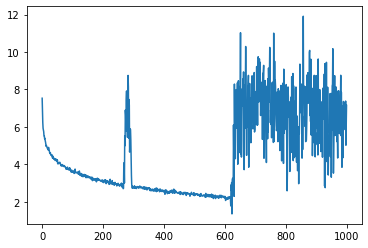

In [46]:
plt.plot(history['gen'])

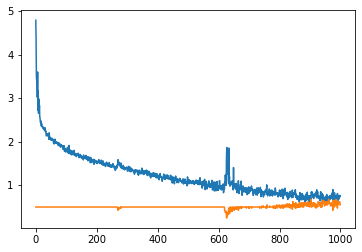

In [47]:
plt.plot(history['dis'])

In [48]:
df1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,0.049896017,0.0,0.0,0.074576885,0.0,0.0035594553,0.0,0.012225969,0.0,0.019287573,...,0.0,0.0,0.0,0.0,0.0,0.06614828,0.0,0.0,0.0,0
1,0.05703238,0.0,0.0,0.0,0.052905086,0.043763362,0.0,0.0,0.0,0.031135669,...,0.0,0.0,0.0,0.006044184,0.0,0.0,0.0,0.0,0.0,0
2,0.05211395,0.0006721932400000001,0.0,0.0,0.01591806,0.02435071,0.0,0.0016837418,0.0,0.02647767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.04974308,0.003009851,0.0,0.0,0.0029502455,0.017709356000000002,0.0,0.0066348887,0.0,0.025008397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.04832898,0.0042979,0.0,0.0,0.0,0.014554087,0.0,0.009138886,0.0,0.024143761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [49]:

y_test=df1.label

x_test=df1.drop('label',axis=1).values.reshape(-1,20,1)


In [50]:
y_test

0          0
1          0
2          0
3          0
4          0
          ..
1048571    0
1048572    0
1048573    0
1048574    0
1048575    0
Name: label, Length: 1048576, dtype: int64

In [51]:
#y_pred=lstmgan.generator.predict(x_test)
y_pred=lstmgan.discriminator.predict(x_test)
print(y_pred)

[[[0.07970018]]

 [[0.18410666]]

 [[0.17668222]]

 ...

 [[0.18324757]]

 [[0.18296733]]

 [[0.18284294]]]


In [52]:
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score

Text(0, 0.5, 'y_pred')

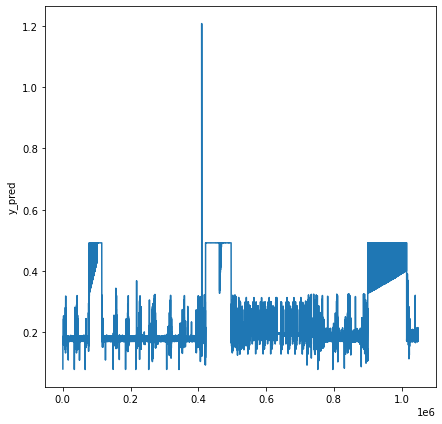

In [53]:
#range of output value
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred)),y_pred.reshape(-1,1))
plt.ylabel('y_pred')

In [54]:
#looking for the optimal probability threshold
#prob=[0.5,0.55,0.6,0.65,0.75,0.8,0.85,0.9,0.95,1,2,2.5,5]
prob=[-0.2,-0.1,-0.05,0,0.005,0.1,.5,1,2]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =-0.2 and f1 score =0.0 : accuracy=0.5681972503662109 : precision=0.43180274963378906 : recall=0.0
1048576 0
prob =-0.1 and f1 score =0.0 : accuracy=0.5681972503662109 : precision=0.43180274963378906 : recall=0.0
1048576 0
prob =-0.05 and f1 score =0.0 : accuracy=0.5681972503662109 : precision=0.43180274963378906 : recall=0.0
1048576 0
prob =0 and f1 score =0.0 : accuracy=0.5681972503662109 : precision=0.43180274963378906 : recall=0.0
1048576 0
prob =0.005 and f1 score =0.0 : accuracy=0.5681972503662109 : precision=0.43180274963378906 : recall=0.0
1048576 0
prob =0.1 and f1 score =0.00014575134819997084 : accuracy=0.5682144165039062 : precision=0.4318213857187183 : recall=7.288339981182831e-05
1048528 48
prob =0.5 and f1 score =0.6031586175935972 : accuracy=0.43180179595947266 : precision=0.4318022077593448 : recall=0.999997791412127
1 1048575
prob =1 and f1 score =0.6031586175935972 : accuracy=0.43180179595947266 : precision=0.4318022077593448 : recall=0.999997791412127
1 1048575

In [55]:
history=dict()
history['gen']=[]
history['dis']=[]
def train1(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= lstmgan.train(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))